## Task 2 : Label a Subset of Dataset in CoNLL Format
In this task, we aim to label the provided dataset in the CoNLL format, which is commonly used for Named Entity Recognition (NER) tasks. The goal is to identify and label key entities such as product names, prices, and locations in Amharic text from Telegram-based e-commerce messages.

Entity Labels:
- B-Product: Marks the beginning of a product name.
- I-Product: Marks a token inside the product name.
- B-LOC: Marks the beginning of a location entity.
- I-LOC: Marks a token inside the location entity.
- B-PRICE: Marks the beginning of a price entity.
- I-PRICE: Marks tokens inside the price entity.
- O: Tokens that are outside of any entities.

Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
# importing modules from scripts 
from scripts.ner_labelling import *

In [4]:
# Load the preprocessed data
df = pd.read_csv('../data/preprocessed_telegram_messages.csv')

In [5]:
# Display the first few rows
print(df[['cleaned_message', 'tokens']].head(10))

                                     cleaned_message  \
0  ለኮንዶሚኒየም ለጠባብ ቤቶች ገላግሌ የሆነ ከንፁህ የሲልከን ጥሬ እቃ የተ...   
1    ከላዩ ፈር ውስጡ ኮተን የሆነ 2000    0909003864 090570...   
2   5     ኦሪጅናል ማቴሪያል በሳይዙ ትልቅ 3200 ብር   09090038...   
3      ምቹ ጠንካራ የልጆች ማዘያ በተለይ ለወንድ ልጆች ፍሬያቸው እንዳይጎ...   
4    400 ብር  .80*2   0909003864 0905707448 እቃ ለማዘ...   
5          ከጡት የሚንጠባጠብ ወተትን ማጠራቀሚያ በቀላሉ ጡት መያዚያ ስ...   
6  ክቡራን ደምበኞቻችን እሁድ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ከ...   
7         250  0909003864 0905707448 ሊንኩን በመጫን ቴሌ...   
8  50   700  0909003864 0905707448 ሊንኩን በመጫን ቴሌግራ...   
9     ባለ ኮፉያ ምቹ ማዘያ በ 3 አቅጣጫ ማዘል የሚያስችል 3300 ብር 8...   

                                              tokens  
0  ['ለኮንዶሚኒየም', 'ለጠባብ', 'ቤቶች', 'ገላግሌ', 'የሆነ', 'ከን...  
1  ['ከላዩ', 'ፈር', 'ውስጡ', 'ኮተን', 'የሆነ', '2000', '09...  
2  ['5', 'ኦሪጅናል', 'ማቴሪያል', 'በሳይዙ', 'ትልቅ', '3200',...  
3  ['ምቹ', 'ጠንካራ', 'የልጆች', 'ማዘያ', 'በተለይ', 'ለወንድ', ...  
4  ['400', 'ብር', '.80*2', '0909003864', '09057074...  
5  ['ከጡት', 'የሚንጠባጠብ', 'ወተትን', 'ማጠራቀሚያ', 'በቀላሉ', '... 

In [6]:
unique_words = df['tokens'].nunique()

print(f'Number of unique words: {unique_words}')

Number of unique words: 1049


In [7]:
unique_words_list = df['tokens'].unique()
print(unique_words_list)

["['ለኮንዶሚኒየም', 'ለጠባብ', 'ቤቶች', 'ገላግሌ', 'የሆነ', 'ከንፁህ', 'የሲልከን', 'ጥሬ', 'እቃ', 'የተሰራ', 'የልጆች', 'ማጠቢያ', 'ምስሉ', 'ላይ', 'እንደሚያዩት', 'መታጠፍ', 'መዘርጋት', 'የሚችል', '3350ብር', 'ይደውሉልን', 'እርሶ', 'መምጣት', 'ባይመቾ', 'እኛ', 'ያሉበት', 'ድረስ', 'እናደርስሎታለን', 'ስልክ', '0905707448', '0909003864', 'ሲና', 'የተመረጡና', 'ጥራታቸውን', 'የጠበቁ', 'የልጆች', 'እቃ', 'አስመጪ', '0909003864', '0905707448', 'እቃ', 'ለማዘዝ', 'ከስር', 'ያለውን', 'ሊንኮች', 'በመጫን', 'ማዘዝ', 'ትችላላቹ', '@', '@2', 'አድራሻ', 'ቁጥር', 'ገርጂ', 'ኢምፔሪያል', 'ከሳሚ', 'ህንፃ', 'ጎን', 'አልፎዝ', 'ፕላዛ', 'ግራውንድ', 'ላይ', 'እንደገቡ', 'ያገኙናል', '2ቁጥር2', '4ኪሎ', 'ቅድስት', 'ስላሴ', 'ህንፃ', 'ማለትም', 'ከብልፅግና', 'ዋናፅፈት', 'ቤት', 'ህንፃ', 'በስተ', 'ቀኝ', 'ባለው', 'አስፓልት', '20ሜትር', 'ዝቅ', 'እንዳሉ', 'ሀበሻ', 'ኮፊ', 'የሚገኝበት', 'ቀይ', 'ሸክላ', 'ህንፃ', '2ተኛ', 'ፎቅ', 'ላይ', 'ያገኙናል', '3ቁጥር3', 'ብስራተ', 'ገብርኤል', 'ላፍቶ', 'ሞል', 'መግቢያው', 'ፊት', 'ለፊት', 'የሚገኘው', 'የብስራተ', 'ገብርኤል', 'ቤተ', 'ክርስቲያን', 'ህንፃ', 'አንደኛ', 'ፎቅ', 'ላይ', 'ደረጃ', 'እንደወጣቹ', 'በስተግራ', 'በኩል', 'ሱቅ', 'ቁጥር', '-09', 'ክቡራን', 'ደምበኞቻችን', 'ገርጂ', 'አልፎዝ', 'ፕላዛ', 'ላይ', 'አራት', 'ኪሎ', 'ቅድስት', 'ስላሴ', 'እንዲሁም', 'ብስራተ', 'ገብሬል', 

In [8]:
# Function to process a single message
def process_single_message(row):
    tokens = eval(row['tokens'])
    labels = label_entities(tokens)
    return create_conll_format(tokens, labels)

### Labeling the Dataset 
Manually label messages in CoNLL format:
- Each word in a message is labeled with its appropriate entity tag ( B-Product, I-Product, B-LOC, B-PRICE, I-PRICE, I-LOC, O)

In [9]:
# Process the messages
labeled_data = df.apply(process_single_message, axis=1)

In [10]:
# Display the first labeled message
print("First labeled message in CoNLL format:")
print(labeled_data.iloc[0])

First labeled message in CoNLL format:
ለኮንዶሚኒየም O
ለጠባብ B-Product
ቤቶች O
ገላግሌ B-Product
የሆነ O
ከንፁህ B-Product
የሲልከን I-Product
ጥሬ I-Product
እቃ I-Product
የተሰራ O
የልጆች B-Product
ማጠቢያ I-Product
ምስሉ O
ላይ B-LOC
እንደሚያዩት O
መታጠፍ B-Product
መዘርጋት I-Product
የሚችል O
3350ብር O
ይደውሉልን O
እርሶ O
መምጣት O
ባይመቾ O
እኛ O
ያሉበት O
ድረስ O
እናደርስሎታለን O
ስልክ O
0905707448 O
0909003864 O
ሲና O
የተመረጡና O
ጥራታቸውን O
የጠበቁ O
የልጆች B-Product
እቃ I-Product
አስመጪ O
0909003864 O
0905707448 O
እቃ B-Product
ለማዘዝ O
ከስር O
ያለውን O
ሊንኮች O
በመጫን O
ማዘዝ O
ትችላላቹ O
@ O
@2 O
አድራሻ B-LOC
ቁጥር I-LOC
ገርጂ I-LOC
ኢምፔሪያል I-LOC
ከሳሚ I-LOC
ህንፃ I-LOC
ጎን I-LOC
አልፎዝ I-LOC
ፕላዛ I-LOC
ግራውንድ I-LOC
ላይ I-LOC
እንደገቡ I-LOC
ያገኙናል I-LOC
2ቁጥር2 O
4ኪሎ B-LOC
ቅድስት I-LOC
ስላሴ I-LOC
ህንፃ I-LOC
ማለትም I-LOC
ከብልፅግና I-LOC
ዋናፅፈት I-LOC
ቤት I-LOC
ህንፃ I-LOC
በስተ I-LOC
ቀኝ I-LOC
ባለው I-LOC
አስፓልት I-LOC
20ሜትር I-LOC
ዝቅ I-LOC
እንዳሉ I-LOC
ሀበሻ I-LOC
ኮፊ I-LOC
የሚገኝበት I-LOC
ቀይ I-LOC
ሸክላ I-LOC
ህንፃ I-LOC
2ተኛ I-LOC
ፎቅ I-LOC
ላይ I-LOC
ያገኙናል I-LOC
3ቁጥር3 O
ብስራተ B-LOC
ገብርኤል I-LOC
ላፍቶ I-LOC
ሞል I-LOC
መግቢያው I-LOC
ፊት I-LOC
ለፊ

### Save the labeled data to a file in conll format 

In [11]:
# Save the labeled data to a file in conll format 
with open('../data/labeled_ner_data.conll', 'w', encoding='utf-8') as f:
    f.write('\n\n'.join(labeled_data))

print(f"\nLabeled  messages and saved to '../data/labeled_ner_data.conll'")


Labeled  messages and saved to '../data/labeled_ner_data.conll'


In [12]:
# Analyze label distribution
all_labels = [label for message in labeled_data for label in message.split('\n') if label]
label_counts = pd.Series([l.split()[-1] for l in all_labels]).value_counts()

print("\nLabel distribution:")
print(label_counts)


Label distribution:
I-LOC        35954
O            33748
B-LOC         4007
B-Product     1391
B-Price        330
I-Price        330
I-Product      212
Name: count, dtype: int64


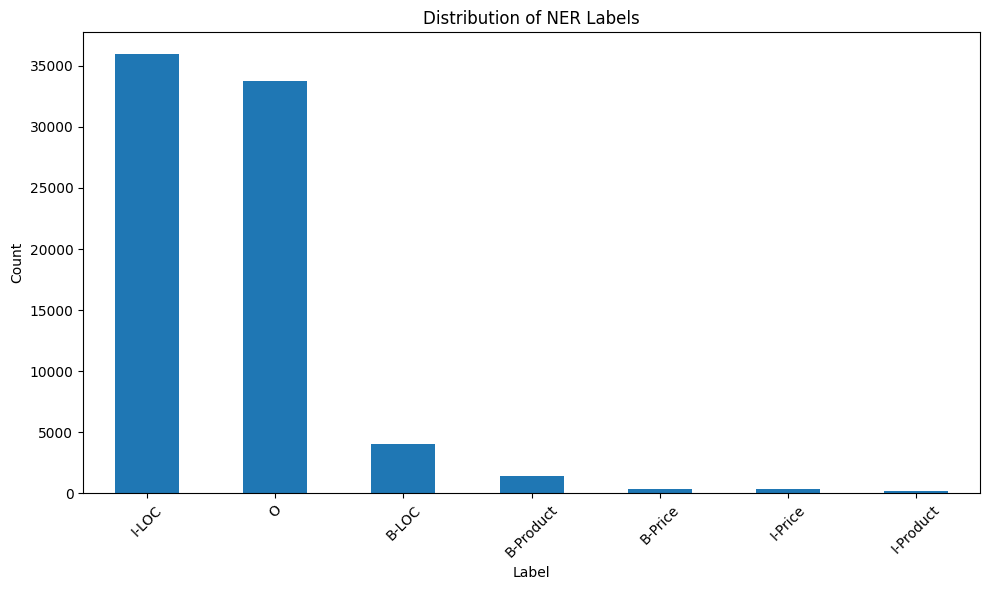

In [13]:
# Visualize label distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of NER Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:

 # Sample tokens (for illustration purposes)
tokens = [
    'የሚሰራ', 'ህንፃ', 'በ', 'ቁጥር', '1ቁጥር1', 'እቃ', '100', 'ብር',
    'አድራሻ', 'ባለው', 'ገላግሌ', 'ከላይ', '4ኪሎ', 'ከብልፅግና',
    '200', 'ማጠቢያ'
    ]

labels = label_entities(tokens)

# Display tokens with their labels
for token, label in zip(tokens, labels):
    print(f"{token}: {label}")

የሚሰራ: B-Product
ህንፃ: B-LOC
በ: O
ቁጥር: B-LOC
1ቁጥር1: O
እቃ: B-Product
100: B-Price
ብር: I-Price
አድራሻ: B-LOC
ባለው: I-LOC
ገላግሌ: B-Product
ከላይ: I-Product
4ኪሎ: B-LOC
ከብልፅግና: I-LOC
200: O
ማጠቢያ: B-Product
